In [ ]:
%pip install -r requirements.txt


In [32]:
import pandas as pd
import os
import tensorflow as tf
import glob as gb
from tensorflow import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
TRAIN_DIR = '/Users/theerat/Downloads/eINTERFACE_2021_Image/train'
TEST_DIR = '/Users/theerat/Downloads/eINTERFACE_2021_Image/test'
VAL_DIR = '/Users/theerat/Downloads/eINTERFACE_2021_Image/val'

In [3]:
BATCH_SIZE= 64
IMAGE_SIZE=(128,128)

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1922 in folder Fear
For training data, found 1922 in folder Surprise
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Happiness
For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 241 in folder Fear
For testing data, found 241 in folder Surprise
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Happiness
For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust


In [6]:
for folder in os.listdir(VAL_DIR):
    files = gb.glob(pathname= str(VAL_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For val data, found {len(files)} in folder {folder}')

For val data, found 240 in folder Fear
For val data, found 240 in folder Surprise
For val data, found 240 in folder Sadness
For val data, found 240 in folder Happiness
For val data, found 237 in folder Anger
For val data, found 236 in folder Disgust


In [ ]:
import os
import pandas as pd


categories = []

for category_label, (root, dirs, files) in enumerate(os.walk(TRAIN_DIR)):
    if category_label == 0:
        continue  # Skip the root directory itself
    category_name = os.path.basename(root)
    for filename in files:
        file_path = os.path.join(root, filename)  # Obtain full file path
        categories.append((file_path, category_name))  # Append full file path and category name

train_df = pd.DataFrame(categories, columns=['image', 'emotion'])

In [8]:
train_df

,image,emotion
0,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
1,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
2,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
3,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
4,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
...,...,...
11470,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
11471,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
11472,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
11473,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust


In [9]:
train_df['emotion'].value_counts()

emotion
Fear         1922
Surprise     1922
Sadness      1922
Happiness    1922
Anger        1896
Disgust      1891
Name: count, dtype: int64

In [10]:
import os
import pandas as pd


categories = []

for category_label, (root, dirs, files) in enumerate(os.walk(TEST_DIR)):
    if category_label == 0:
        continue  # Skip the root directory itself
    category_name = os.path.basename(root)
    for filename in files:
        file_path = os.path.join(root, filename)  # Obtain full file path
        categories.append((file_path, category_name))  # Append full file path and category name
test_df = pd.DataFrame(categories, columns=['image', 'emotion'])

In [11]:
test_df

,image,emotion
0,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
1,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
2,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
3,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
4,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
...,...,...
1433,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1434,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1435,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1436,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust


In [12]:
import os
import pandas as pd


categories = []

for category_label, (root, dirs, files) in enumerate(os.walk(VAL_DIR)):
    if category_label == 0:
        continue  # Skip the root directory itself
    category_name = os.path.basename(root)
    for filename in files:
        file_path = os.path.join(root, filename)  # Obtain full file path
        categories.append((file_path, category_name))  # Append full file path and category name
val_df = pd.DataFrame(categories, columns=['image', 'emotion'])

In [13]:
val_df

,image,emotion
0,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
1,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
2,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
3,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
4,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Fear
...,...,...
1428,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1429,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1430,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust
1431,/Users/theerat/Downloads/eINTERFACE_2021_Image...,Disgust


random photo

In [14]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [15]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


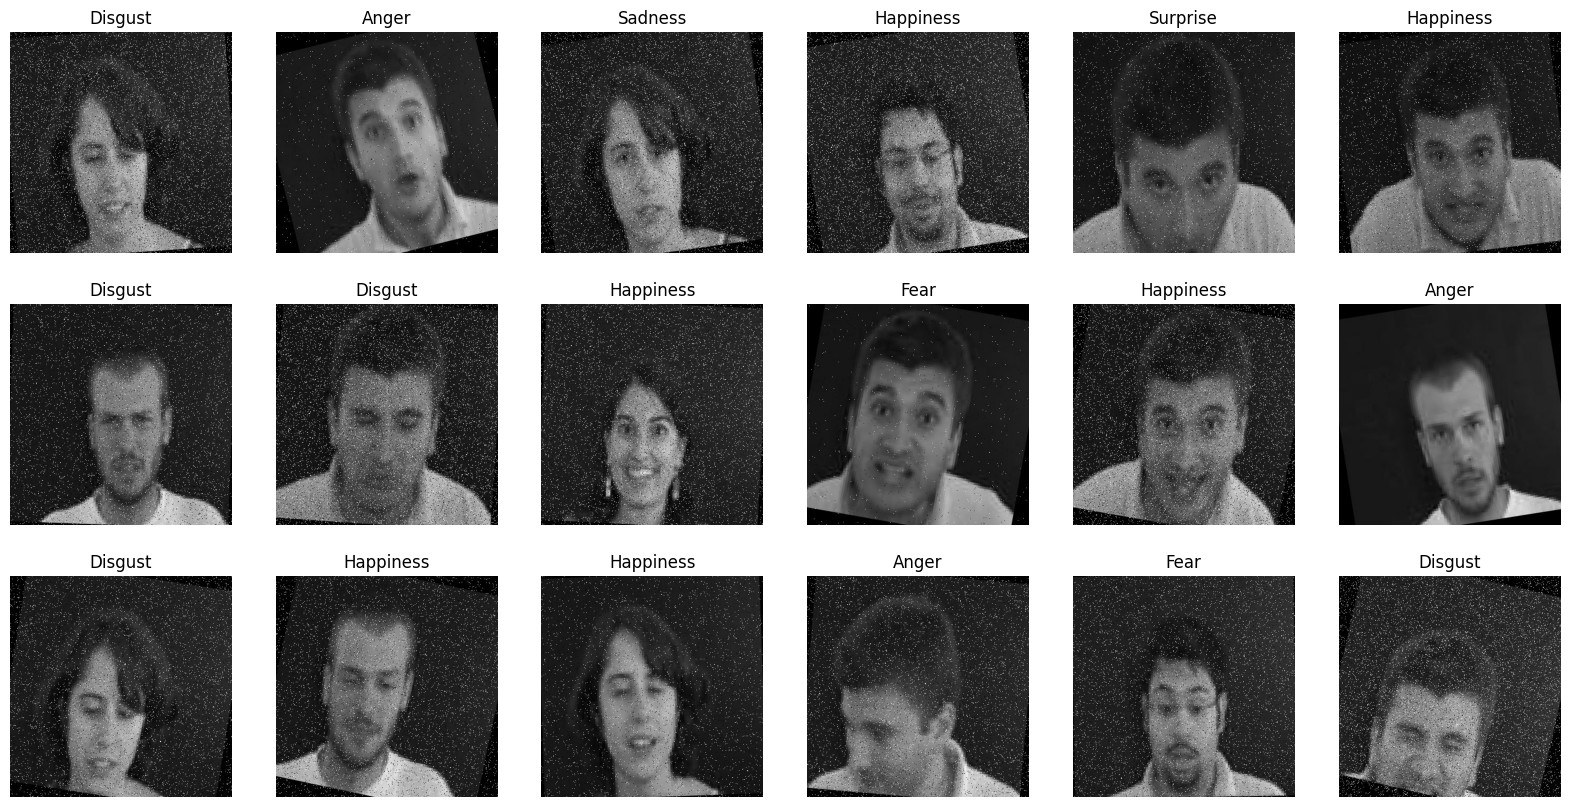

In [16]:
#Visualize random images
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/Users/theerat/Downloads/eINTERFACE_2021_Image/train/", target_class=class_name)

# __MODEL JAA__

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(6, activation='softmax')) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 40, 40, 64)       

In [25]:
test_df["emotion"] = test_df["emotion"].replace({0: 'Anger', 1: 'Disgust',2: 'Fear',3: 'Happiness',4: 'Sadness',5: 'Surprise'}) 

In [26]:
train_df["emotion"] = train_df["emotion"].replace({0: 'Anger', 1: 'Disgust',2: 'Fear',3: 'Happiness',4: 'Sadness',5: 'Surprise'}) 

In [28]:
val_df["emotion"] = val_df["emotion"].replace({0: 'Anger', 1: 'Disgust',2: 'Fear',3: 'Happiness',4: 'Sadness',5: 'Surprise'}) 

In [29]:
total_train = train_df.shape[0]
total_validate = val_df.shape[0]
total_test = test_df.shape[0]
batch_size=64

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    x_col='image',
    y_col='emotion',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 11475 validated image filenames belonging to 6 classes.


In [36]:
validate_datagen = ImageDataGenerator(
    rescale=1./255,
)

validate_generator = validate_datagen.flow_from_dataframe(
    val_df, 
    x_col='image',
    y_col='emotion',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1433 validated image filenames belonging to 6 classes.


In [37]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    x_col='image',
    y_col='emotion',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 1438 validated image filenames belonging to 6 classes.


In [39]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (128,128),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 11475 images belonging to 6 classes.


In [40]:
test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (128,128),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 1438 images belonging to 6 classes.


In [41]:
validate_data = validate_datagen.flow_from_directory(
    VAL_DIR,
    target_size = (128,128),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 1433 images belonging to 6 classes.


In [42]:
FAST_RUN = False

In [43]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [44]:
# Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

# ReduceLROnPlateau ป้องกันการเกิด Overfitting
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                factor=0.6,
                                patience=5,
                                min_lr=0.00005,
                                verbose=1)

In [45]:
epochs = 3 if FAST_RUN else 20

history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validate_generator,
    callbacks=[early_stopping_callback, reduce_lr])

model.save("face_emotion.h5")

Epoch 1/20
180/180 [==============================] - 132s 727ms/step - loss: 1.5274 - accuracy: 0.4015 - val_loss: 15.1440 - val_accuracy: 0.1675 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 129s 717ms/step - loss: 1.1302 - accuracy: 0.5594 - val_loss: 2.0508 - val_accuracy: 0.3147 - lr: 0.0010
Epoch 3/20
180/180 [==============================] - 123s 685ms/step - loss: 0.9251 - accuracy: 0.6555 - val_loss: 1.1740 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/20
180/180 [==============================] - 122s 679ms/step - loss: 0.7612 - accuracy: 0.7176 - val_loss: 0.8919 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 5/20
180/180 [==============================] - 131s 726ms/step - loss: 0.6547 - accuracy: 0.7603 - val_loss: 0.7697 - val_accuracy: 0.6943 - lr: 0.0010
Epoch 6/20
180/180 [==============================] - 125s 692ms/step - loss: 0.5642 - accuracy: 0.8031 - val_loss: 0.7083 - val_accuracy: 0.7397 - lr: 0.0010
Epoch 7/20
180/180 [=========================

/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
model.evaluate(validate_generator)

23/23 [==============================] - 4s 180ms/step - loss: 0.2736 - accuracy: 0.9037


[0.27358579635620117, 0.9036985635757446]

In [47]:
ModelLoss, ModelAccuracy = model.evaluate(test_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

23/23 [==============================] - 7s 302ms/step - loss: 0.2479 - accuracy: 0.9145
Test Loss is 0.24791014194488525
Test Accuracy is 0.91446453332901


Text(0, 0.5, 'Loss')

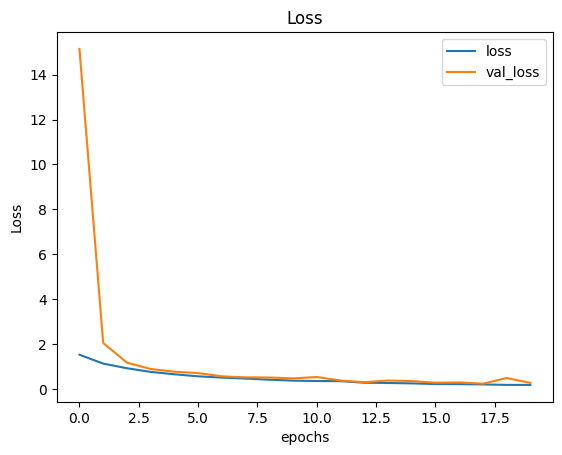

In [48]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

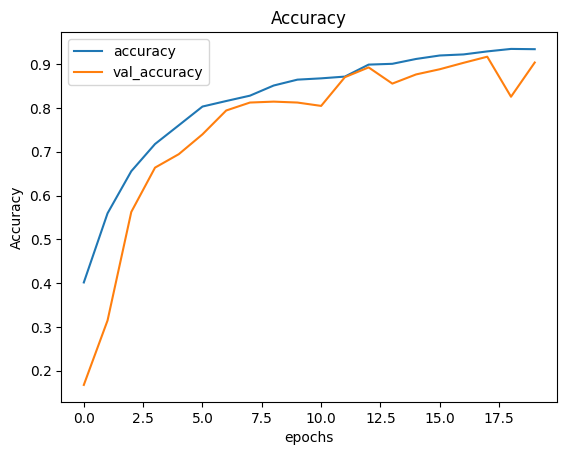

In [49]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [50]:
import os
import pandas as pd


categories = []

for category_label, (root, dirs, files) in enumerate(os.walk(TEST_DIR)):
    if category_label == 0:
        continue  # Skip the root directory itself
    category_name = os.path.basename(root)
    for filename in files:
        file_path = os.path.join(root, filename)  # Obtain full file path
        categories.append((file_path, category_name))  # Append full file path and category name
pred_df = pd.DataFrame(categories, columns=['image', 'emotion'])

In [51]:
pred_df = pred_df.drop(columns=['emotion'])

In [52]:
pred_df

,image
0,/Users/theerat/Downloads/eINTERFACE_2021_Image...
1,/Users/theerat/Downloads/eINTERFACE_2021_Image...
2,/Users/theerat/Downloads/eINTERFACE_2021_Image...
3,/Users/theerat/Downloads/eINTERFACE_2021_Image...
4,/Users/theerat/Downloads/eINTERFACE_2021_Image...
...,...
1433,/Users/theerat/Downloads/eINTERFACE_2021_Image...
1434,/Users/theerat/Downloads/eINTERFACE_2021_Image...
1435,/Users/theerat/Downloads/eINTERFACE_2021_Image...
1436,/Users/theerat/Downloads/eINTERFACE_2021_Image...


In [53]:
pred_gen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_gen.flow_from_dataframe(
    pred_df, 
    x_col='image',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1438 validated image filenames.


In [54]:
predict = model.predict(pred_generator)

23/23 [==============================] - 4s 173ms/step


In [55]:
pred_df['emotion'] = np.argmax(predict, axis=-1)

In [56]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
pred_df['emotion'] = pred_df['emotion'].replace(label_map)

In [57]:
pred_df["emotion"] = pred_df["emotion"].replace({0: 'Anger', 1: 'Disgust',2: 'Fear',3: 'Happiness',4: 'Sadness',5: 'Surprise'}) 

<Axes: xlabel='emotion'>

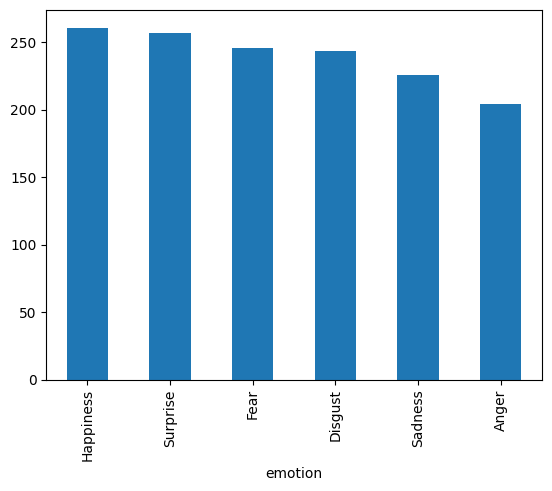

In [58]:
pred_df['emotion'].value_counts().plot.bar()

In [59]:
pred_df['emotion'].value_counts()

emotion
Happiness    261
Surprise     257
Fear         246
Disgust      244
Sadness      226
Anger        204
Name: count, dtype: int64

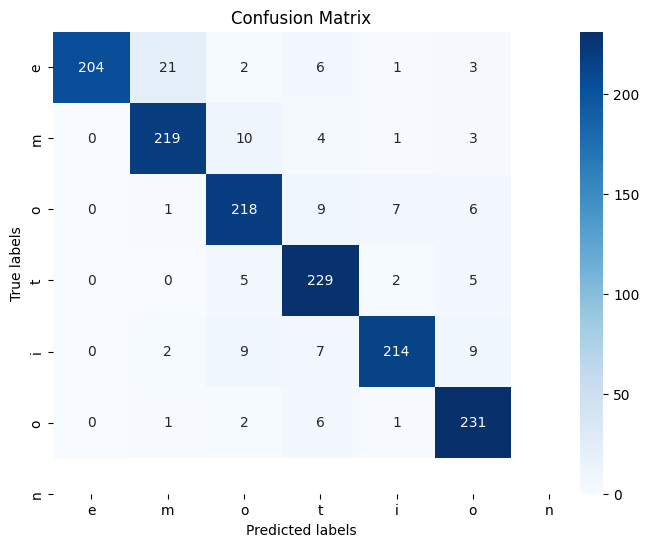

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'actual_labels' contains the true labels and 'predicted_labels' contains the predicted labels

# Compute confusion matrix
cm = confusion_matrix(test_df["emotion"], pred_df["emotion"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels="emotion", yticklabels="emotion")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

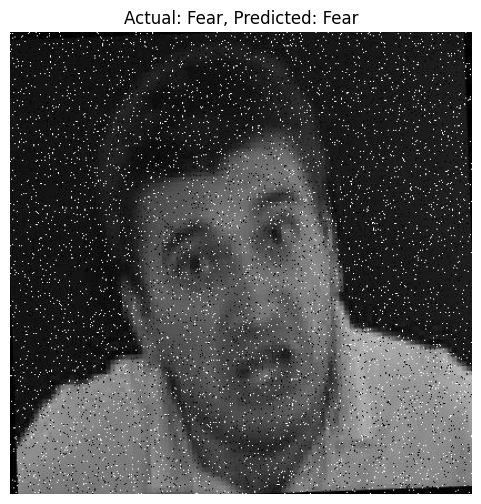

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Randomly select a row from test_df and pred_df
index = random.randint(0, len(test_df) - 1)
test_row = test_df.iloc[index]
pred_row = pred_df.iloc[index]

# Extract actual and predicted emotions
actual_emotion = test_row['emotion']
predicted_emotion = pred_row['emotion']

# Load and display the image
filename = test_row['image']
img = plt.imread(filename)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Actual: {actual_emotion}, Predicted: {predicted_emotion}")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
